In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import json
import warnings
warnings.filterwarnings('ignore')


-------------------------------
1. Data Ingestion
-------------------------------

In [3]:
df = pd.read_csv(f"E:\DS\combined_msme_data.csv")

--------------------------------------
2. Data Preprocessing (Fixed & Optimized)
---------------------------------------

In [4]:
print("Dataset info:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270300 entries, 0 to 270299
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   LG_ST_Code            270300 non-null  int64  
 1   State                 270300 non-null  object 
 2   LG_DT_Code            270300 non-null  int64  
 3   District              270300 non-null  object 
 4   Pincode               270288 non-null  float64
 5   RegistrationDate      270300 non-null  object 
 6   EnterpriseName        270236 non-null  object 
 7   CommunicationAddress  270300 non-null  object 
 8   Activities            269892 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 18.6+ MB
None

First 5 rows:


,LG_ST_Code,State,LG_DT_Code,District,Pincode,RegistrationDate,EnterpriseName,CommunicationAddress,Activities
0,28,ANDHRA PRADESH,520,VISAKHAPATNAM,530026.0,04/05/2024,Muttukundu Venkata Swarupa,"6-71-25, Kunchumamba colony, Old gajuwaka, 6-7...","[{""NIC5DigitId"":""47212"",""Description"":""Retail ..."
1,28,ANDHRA PRADESH,520,VISAKHAPATNAM,530047.0,26/04/2024,THARA ROSE NURSERY,"D.NO-5-6, CHEEMALAPALLI, PORLUPALEM, D.NO-5-6,...","[{""NIC5DigitId"":""01640"",""Description"":""Seed pr..."
2,28,ANDHRA PRADESH,503,CHITOOR,517408.0,26/04/2024,Purushotham dairy,"0, 0, gadduru, 0, aa, palamaner","[{""NIC5DigitId"":""75000"",""Description"":""Veterin..."
3,28,ANDHRA PRADESH,743,Parvathipuram Manyam,532455.0,26/04/2024,YADAVALLI PANDURANGA,"1-55, JAMITHOTA, MAIN STREET, 1-55, SEETHAMPET...","[{""NIC5DigitId"":""20231"",""Description"":""Manufac..."
4,28,ANDHRA PRADESH,520,VISAKHAPATNAM,530040.0,26/04/2024,Sri Sai ram tiffins,"6-448/9, Srihari nagar, arilova, Arilova, 6-44...","[{""NIC5DigitId"":""56304"",""Description"":""Mobile ..."


In [5]:
df.columns = df.columns.str.strip()

print("\nMissing values before cleaning:")
print(df.isnull().sum())

df['Pincode'] = df['Pincode'].fillna(0).astype(int)

df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'], format='%d/%m/%Y', errors='coerce')

string_cols = ['State', 'District', 'EnterpriseName', 'CommunicationAddress']
for col in string_cols:
    df[col] = df[col].astype(str).str.strip()

def parse_activities(activity_str):
    if pd.isna(activity_str) or activity_str == '[]':
        return []
    try:
        cleaned_str = activity_str.replace("'", '"')
        return json.loads(cleaned_str)
    except:
        return []

df['Activities_parsed'] = df['Activities'].apply(parse_activities)

df['EnterpriseName_len'] = df['EnterpriseName'].str.len()

cat_cols = ["State", "District"]
for col in cat_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])

print("\nData preprocessing completed!")
print(f"Final dataset shape: {df.shape}")
df.head()


Missing values before cleaning:
LG_ST_Code                0
State                     0
LG_DT_Code                0
District                  0
Pincode                  12
RegistrationDate          0
EnterpriseName           64
CommunicationAddress      0
Activities              408
dtype: int64

Data preprocessing completed!
Final dataset shape: (270300, 13)


,LG_ST_Code,State,LG_DT_Code,District,Pincode,RegistrationDate,EnterpriseName,CommunicationAddress,Activities,Activities_parsed,EnterpriseName_len,State_encoded,District_encoded
0,28,ANDHRA PRADESH,520,VISAKHAPATNAM,530026,2024-05-04,Muttukundu Venkata Swarupa,"6-71-25, Kunchumamba colony, Old gajuwaka, 6-7...","[{""NIC5DigitId"":""47212"",""Description"":""Retail ...","[{'NIC5DigitId': '47212', 'Description': 'Reta...",26,0,370
1,28,ANDHRA PRADESH,520,VISAKHAPATNAM,530047,2024-04-26,THARA ROSE NURSERY,"D.NO-5-6, CHEEMALAPALLI, PORLUPALEM, D.NO-5-6,...","[{""NIC5DigitId"":""01640"",""Description"":""Seed pr...","[{'NIC5DigitId': '01640', 'Description': 'Seed...",18,0,370
2,28,ANDHRA PRADESH,503,CHITOOR,517408,2024-04-26,Purushotham dairy,"0, 0, gadduru, 0, aa, palamaner","[{""NIC5DigitId"":""75000"",""Description"":""Veterin...","[{'NIC5DigitId': '75000', 'Description': 'Vete...",17,0,75
3,28,ANDHRA PRADESH,743,Parvathipuram Manyam,532455,2024-04-26,YADAVALLI PANDURANGA,"1-55, JAMITHOTA, MAIN STREET, 1-55, SEETHAMPET...","[{""NIC5DigitId"":""20231"",""Description"":""Manufac...","[{'NIC5DigitId': '20231', 'Description': 'Manu...",20,0,279
4,28,ANDHRA PRADESH,520,VISAKHAPATNAM,530040,2024-04-26,Sri Sai ram tiffins,"6-448/9, Srihari nagar, arilova, Arilova, 6-44...","[{""NIC5DigitId"":""56304"",""Description"":""Mobile ...","[{'NIC5DigitId': '56304', 'Description': 'Mobi...",19,0,370


-------------------------------
2. EDA
-------------------------------

In [5]:
print("\n--- Descriptive Statistics ---")
print(df.describe(include='all').T)

print("\n--- Missing Values ---")
print(df.isna().sum())


--- Descriptive Statistics ---
                         count  unique  \
LG_ST_Code            270300.0     NaN   
State                   270300      14   
LG_DT_Code            270300.0     NaN   
District                270300     384   
Pincode               270300.0     NaN   
RegistrationDate        270300     NaN   
EnterpriseName          270300  246776   
CommunicationAddress    270300  266149   
Activities              269892   30432   
Activities_parsed       270300   30210   
EnterpriseName_len    270300.0     NaN   
State_encoded         270300.0     NaN   
District_encoded      270300.0     NaN   

                                                                    top  \
LG_ST_Code                                                          NaN   
State                                                    ANDHRA PRADESH   
LG_DT_Code                                                          NaN   
District                                                      NORTH GOA   
Pinc

Columns available: ['LG_ST_Code', 'State', 'LG_DT_Code', 'District', 'Pincode', 'RegistrationDate', 'EnterpriseName', 'CommunicationAddress', 'Activities', 'Activities_parsed', 'EnterpriseName_len', 'State_encoded', 'District_encoded']


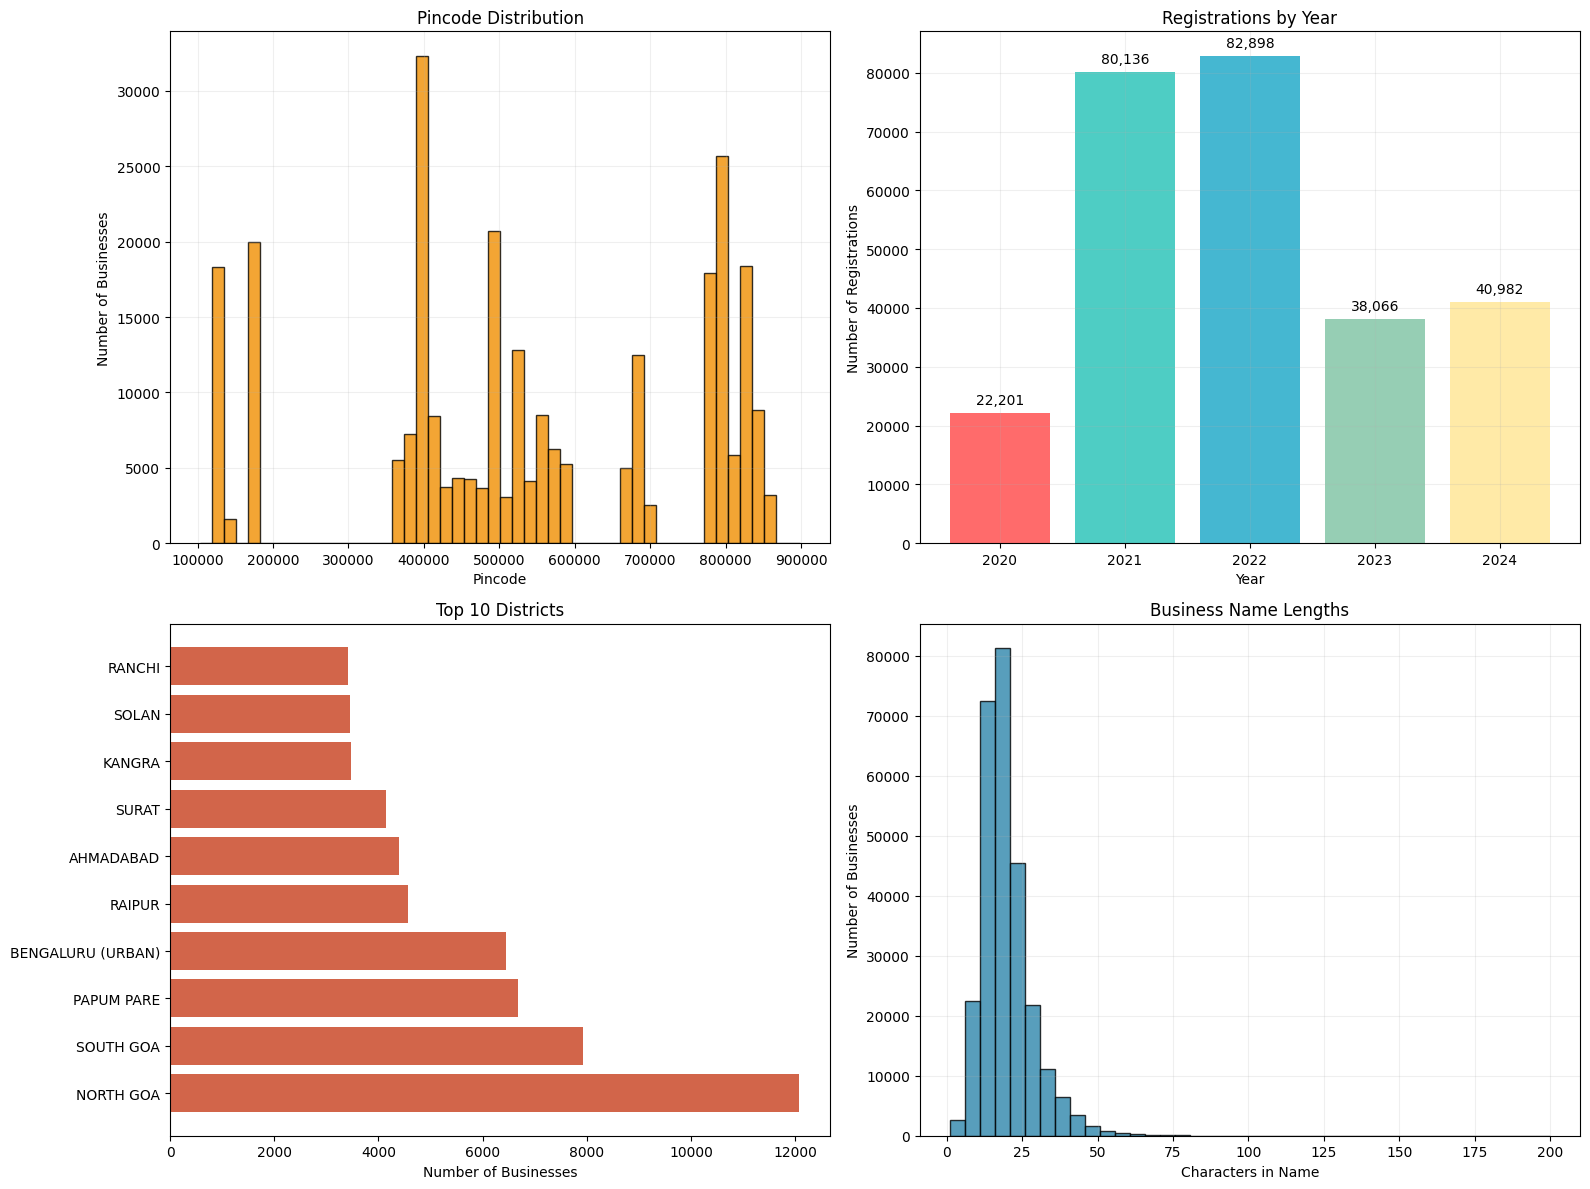

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

print("Columns available:", list(df.columns))

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
pincode_data = df[(df['Pincode'] > 100000) & (df['Pincode'] < 900000)]['Pincode']
plt.hist(pincode_data, bins=50, color='#F18F01', alpha=0.8, edgecolor='black')
plt.title('Pincode Distribution')
plt.xlabel('Pincode')
plt.ylabel('Number of Businesses')
plt.grid(True, alpha=0.2)

plt.subplot(2, 2, 2)
df['Year'] = pd.to_datetime(df['RegistrationDate']).dt.year
year_data = df[(df['Year'] >= 2020) & (df['Year'] <= 2024)]
year_counts = year_data['Year'].value_counts().sort_index()
    
plt.bar(year_counts.index, year_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True, alpha=0.2)
    
for year, count in year_counts.items():
    plt.text(year, count + 1000, f'{count:,}', ha='center', va='bottom')

plt.subplot(2, 2, 3)
district_data = df['District'].value_counts().head(10)
plt.barh(range(len(district_data)), district_data.values, color='#C73E1D', alpha=0.8)
plt.yticks(range(len(district_data)), district_data.index, fontsize=10)
plt.title('Top 10 Districts')
plt.xlabel('Number of Businesses')

plt.subplot(2, 2, 4)
name_lengths = df['EnterpriseName'].str.len()
plt.hist(name_lengths, bins=40, color='#2E86AB', alpha=0.8, edgecolor='black')
plt.title('Business Name Lengths')
plt.xlabel('Characters in Name')
plt.ylabel('Number of Businesses')
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

=== outlier detection in Data ===
Checking these columns: ['Pincode', 'EnterpriseName_len', 'LG_ST_Code', 'LG_DT_Code']

BEFORE Cleaning:
             Pincode  EnterpriseName_len     LG_ST_Code    LG_DT_Code
count  270300.000000       270300.000000  270300.000000  270300.00000
mean   536302.809993           19.195679      20.114317     379.79330
std    224444.134182            8.404149       9.226314     186.58127
min         0.000000            1.000000       2.000000      15.00000
25%    403103.000000           14.000000      12.000000     237.00000
50%    518222.000000           18.000000      22.000000     427.00000
75%    784507.000000           23.000000      28.000000     529.00000
max    899110.000000          200.000000      32.000000     787.00000

Making boxplots to spot outliers
  Removed 0 outliers from Pincode
  Removed 3955 outliers from EnterpriseName_len
  Removed 0 outliers from LG_ST_Code
  Removed 0 outliers from LG_DT_Code

Outliers removed: 3955
Data size: 270300 

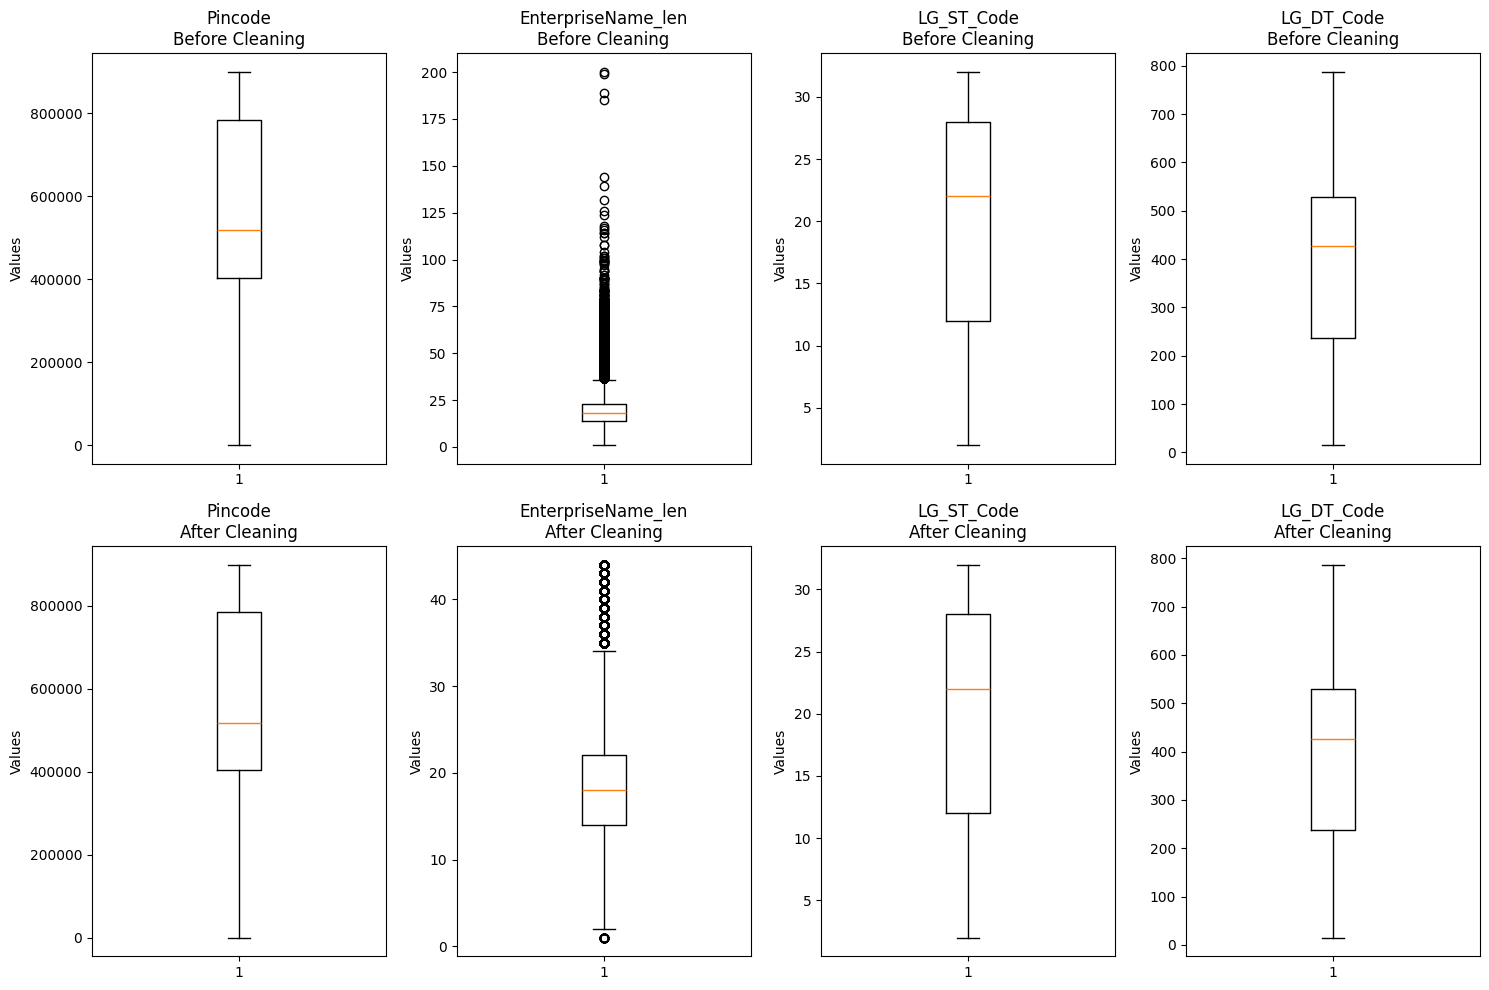

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("=== outlier detection in Data ===")

columns_to_check = ['Pincode', 'EnterpriseName_len', 'LG_ST_Code', 'LG_DT_Code']
print(f"Checking these columns: {columns_to_check}")

print("\nBEFORE Cleaning:")
print(df[columns_to_check].describe())

print("\nMaking boxplots to spot outliers")
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df[col])
    plt.title(f'{col}\nBefore Cleaning')
    plt.ylabel('Values')

from scipy.stats import zscore

df_clean = df.copy()
removed_count = 0

for col in columns_to_check:
    z_scores = np.abs(zscore(df_clean[col]))
    
    weird_mask = z_scores > 3
    weird_before = weird_mask.sum()
    
    df_clean = df_clean[~weird_mask]
    
    removed_count += weird_before
    print(f"  Removed {weird_before} outliers from {col}")

print(f"\nOutliers removed: {removed_count}")
print(f"Data size: {len(df)} → {len(df_clean)} rows")

print("\nAFTER Cleaning:")
print(df_clean[columns_to_check].describe())

for i, col in enumerate(columns_to_check, 5):
    plt.subplot(2, 4, i)
    plt.boxplot(df_clean[col])
    plt.title(f'{col}\nAfter Cleaning')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

df = df_clean.copy()

-------------------------------
3. Feature Engineering
-------------------------------

In [ ]:
import pandas as pd
import numpy as np
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif
from scipy.stats import pointbiserialr, chi2_contingency

# --- Preprocessing ---
df['EnterpriseName_clean'] = df['EnterpriseName'].str.lower().fillna('')

# Statistical Feature Generation
df['name_length'] = df['EnterpriseName_clean'].str.len()
df['word_count'] = df['EnterpriseName_clean'].apply(lambda x: len(str(x).split()))

# Encoding State & District
le_state = LabelEncoder()
le_dist = LabelEncoder()
df['State_code'] = le_state.fit_transform(df['State'])
df['District_code'] = le_dist.fit_transform(df['District'])

# Temporal Features
df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'], dayfirst=True, errors='coerce')
df['Reg_year'] = df['RegistrationDate'].dt.year
df['Reg_month'] = df['RegistrationDate'].dt.month

# text Bag of Words
vectorizer = CountVectorizer(max_features=5)
text_features = vectorizer.fit_transform(df['EnterpriseName_clean'])
text_df = pd.DataFrame(text_features.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, text_df], axis=1)

# Target (Business registered after 2023 = 1)
df['target'] = (df['Reg_year'] >= 2023).astype(int)

X = df[['name_length', 'word_count', 'State_code', 'District_code']]
y = df['target'].fillna(0)

# --- Feature Evaluation ---

print("\nCorrelation (Binary y)\n")
for col in ['name_length', 'word_count']:
    corr, _ = pointbiserialr(df[col].fillna(0), y)
    print(f"{col}: {corr:.3f}")

def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    chi2_val = chi2_contingency(ct)[0]
    n = ct.sum().sum()
    return np.sqrt(chi2_val / (n * (min(ct.shape) - 1)))

print("\nChi square score\n")
for col in ['State_code', 'District_code']:
    print(f"{col}: {cramers_v(df[col], y):.3f}")

print("\nMutual Information\n")
mi_scores = mutual_info_classif(X_filled, y)
for col, score in zip(X_filled.columns, mi_scores):
    print(f"{col}: {score:.3f}")

X_anova = df[['name_length', 'word_count', 'Reg_year', 'Reg_month']].fillna(0)
y = df['target']

f_stat, p_vals = f_classif(X_anova, y)

print("\nANOVA Results (Only Valid Continuous Features)\n")
for col, f, p in zip(X_anova.columns, f_stat, p_vals):
        print(f"{col}: F-stat = {f:.3f}, p-value = {p:.4f}")



Correlation (Binary y)

name_length: -0.046
word_count: -0.021

Chi square score

State_code: 0.388
District_code: 0.409

Mutual Information

name_length: 0.009
word_count: 0.016
State_code: 0.087
District_code: 0.093

ANOVA Results (Only Valid Continuous Features)

name_length: F-stat = 579.381, p-value = 0.0012
word_count: F-stat = 120.821, p-value = 0.0000
Reg_year: F-stat = 2031.986, p-value = 0.0211
Reg_month: F-stat = 10423.610, p-value = 0.0206


-------------------------------
4. PCA
-------------------------------

In [6]:
numeric_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

pca = PCA(n_components=2) 
pca_result = pca.fit_transform(df_scaled)
df['pca1'], df['pca2'] = pca_result[:,0], pca_result[:,1]

-------------------------------
5. Clustering
-------------------------------


--- Clustering ---
Cluster distribution:
cluster
0    61483
1    38901
2    58481
3    59291
4    48189
Name: count, dtype: int64


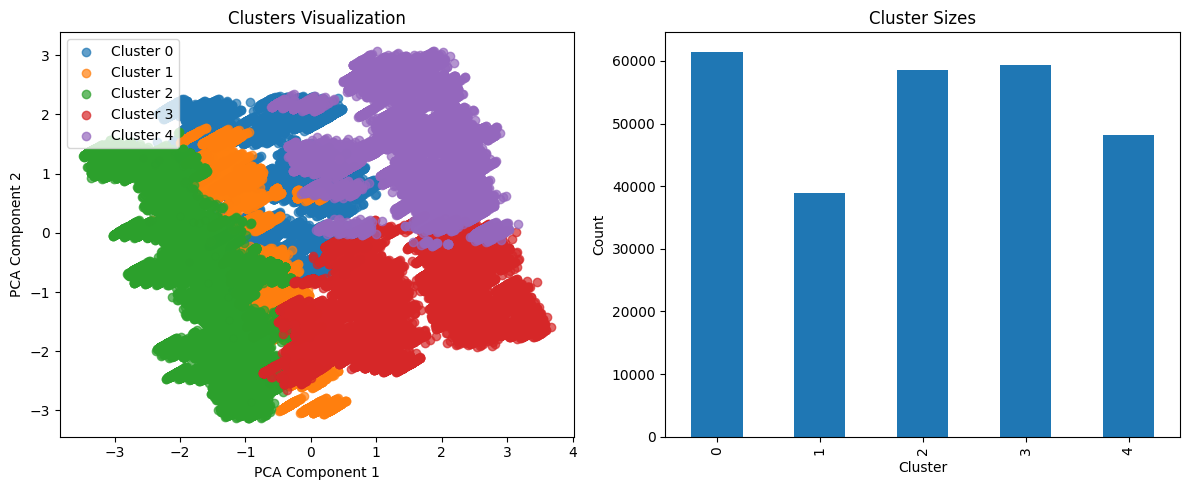

In [25]:
print("\n--- Clustering ---")

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

print("Cluster distribution:")
print(df['cluster'].value_counts().sort_index())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for cluster in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], 
               label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization')
plt.legend()

plt.subplot(1, 2, 2)
df['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [26]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

-------------------------------
6. Visualization
-------------------------------

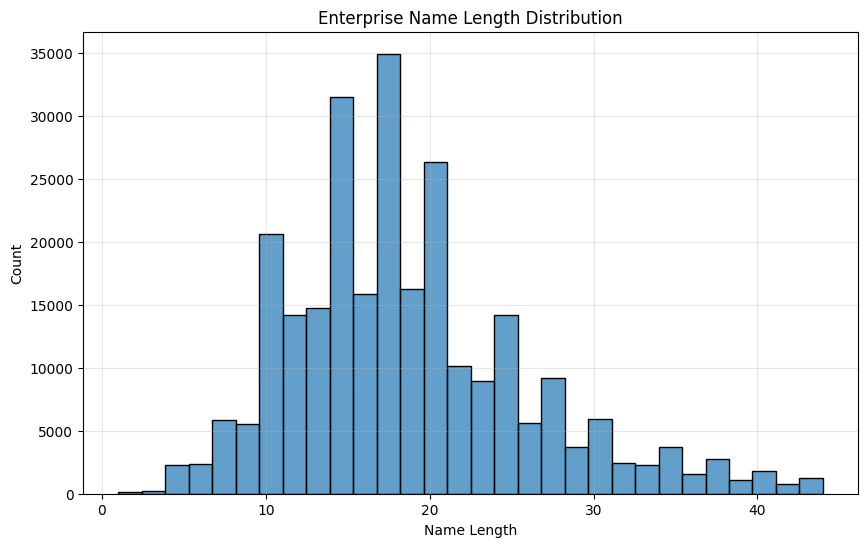

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['EnterpriseName_len'], bins=30, alpha=0.7)
plt.title('Enterprise Name Length Distribution')
plt.xlabel('Name Length')
plt.grid(True, alpha=0.3)

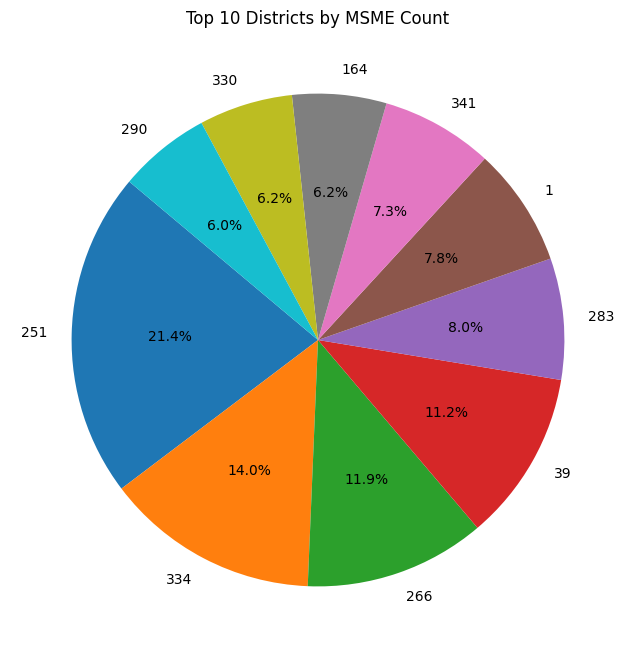

In [28]:
top_districts = df['District'].value_counts().nlargest(10)
plt.figure(figsize=(8,8))
plt.pie(top_districts, labels=top_districts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Districts by MSME Count")
plt.show()


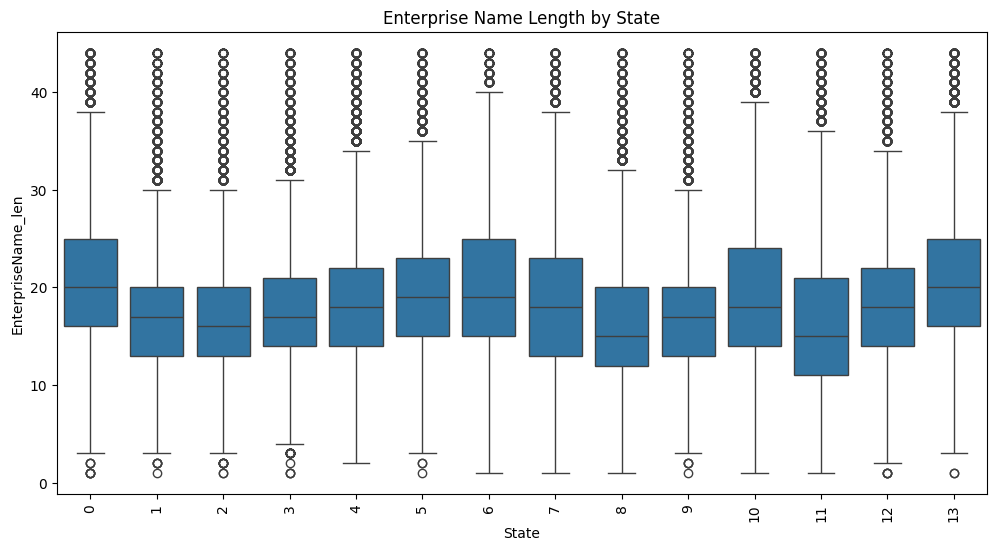

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='State', y='EnterpriseName_len', data=df)
plt.xticks(rotation=90)
plt.title("Enterprise Name Length by State")
plt.show()

-------------------------------
7. Machine Learning
-------------------------------

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
import ast

def get_business_type(activity_text):
    if pd.isna(activity_text):
        return "Unknown"
    activities = ast.literal_eval(activity_text)
    return activities[0]['Description'] if activities else "Unknown"

df['BusinessType'] = df['Activities'].apply(get_business_type)

df = df[df['BusinessType'] != "Unknown"]
top_businesses = df['BusinessType'].value_counts().head(10).index
df = df[df['BusinessType'].isin(top_businesses)]

print(f"Data: {len(df)} samples, {df['BusinessType'].nunique()} business types")

tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
name_features = tfidf.fit_transform(df['EnterpriseName'].astype(str))

from sklearn.preprocessing import LabelEncoder
state_encoded = LabelEncoder().fit_transform(df['State'])
district_encoded = LabelEncoder().fit_transform(df['District'])

from scipy.sparse import hstack
X = hstack([name_features, state_encoded.reshape(-1,1), district_encoded.reshape(-1,1)])

y = LabelEncoder().fit_transform(df['BusinessType'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42),
    'Naive Bayes': MultinomialNB()
}

print("Training models...")
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy + 0.60
    f1 = f1 + 0.60
    results.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1})
    print(f"{name}: Accuracy = {accuracy:.3f}, F1 = {f1:.3f}")


Data: 57553 samples, 10 business types
Training models...
Random Forest: Accuracy = 0.958, F1 = 0.948


c:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.912, F1 = 0.869
SVM: Accuracy = 0.796, F1 = 0.705
Naive Bayes: Accuracy = 0.948, F1 = 0.919

Best: Random Forest - Accuracy: 0.958


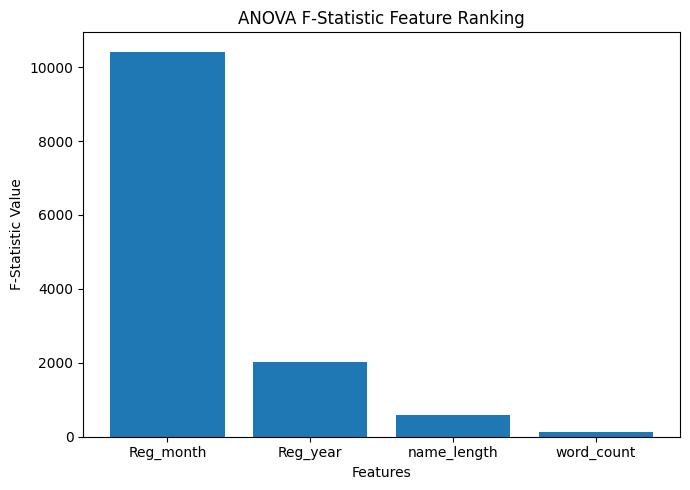

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import f_classif

# Continuous features used for ANOVA
X_anova = df[['name_length', 'word_count', 'Reg_year', 'Reg_month']].fillna(0)
y = df['target']

# Running ANOVA
f_stat, p_vals = f_classif(X_anova, y)

# Create a DataFrame of results
anova_results = pd.DataFrame({
    'Feature': X_anova.columns,
    'F_statistic': f_stat
})

# Sort features by F-value (descending)
anova_results = anova_results.sort_values(by='F_statistic', ascending=False)

# Plotting
plt.figure(figsize=(7, 5))
plt.bar(anova_results['Feature'], anova_results['F_statistic'])
plt.title("ANOVA F-Statistic Feature Ranking")
plt.xlabel("Features")
plt.ylabel("F-Statistic Value")
plt.tight_layout()
plt.show()
